# Website Performance Analysis and Performance using python

In [1]:
# Import neceesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Google Analytics 4 (GA4) data
# Note: Header=1 because GA4 exports have metadata in the first row
data = pd.read_csv('data-export.csv', header = 1)
data.head(3)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [4]:
data.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2.024050e+09,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


In [5]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

In [6]:
# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

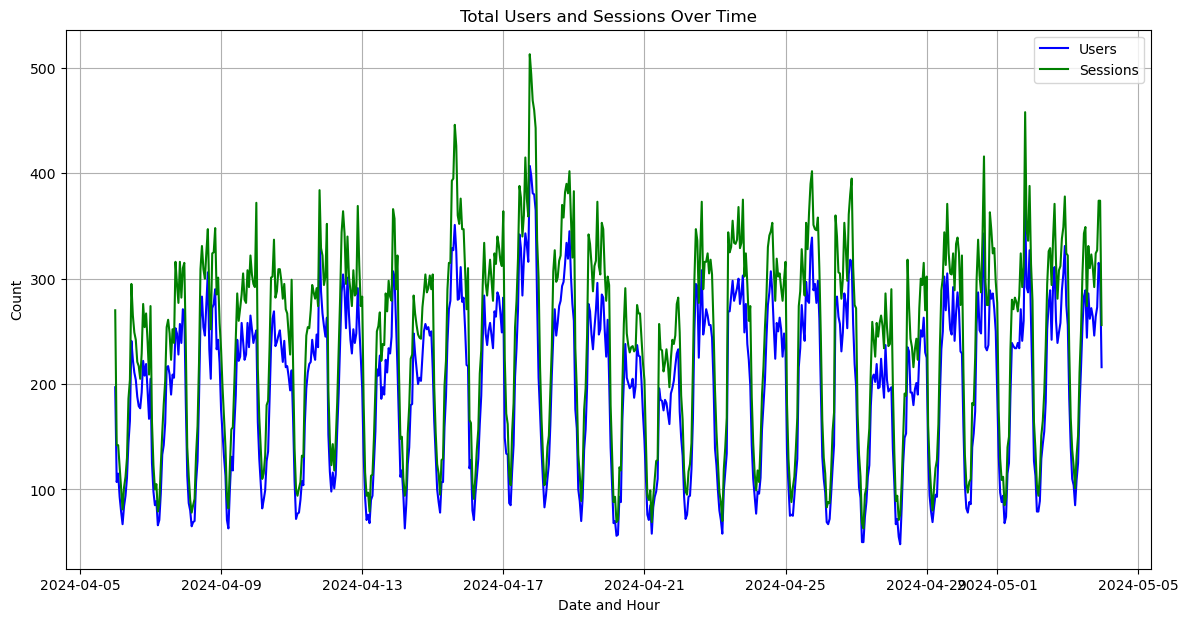

In [7]:
# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Observation:

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions appear to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks might correspond to specific marketing activities, promotions, or events.

### User Engagement Analysis

In [8]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

In [9]:
# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

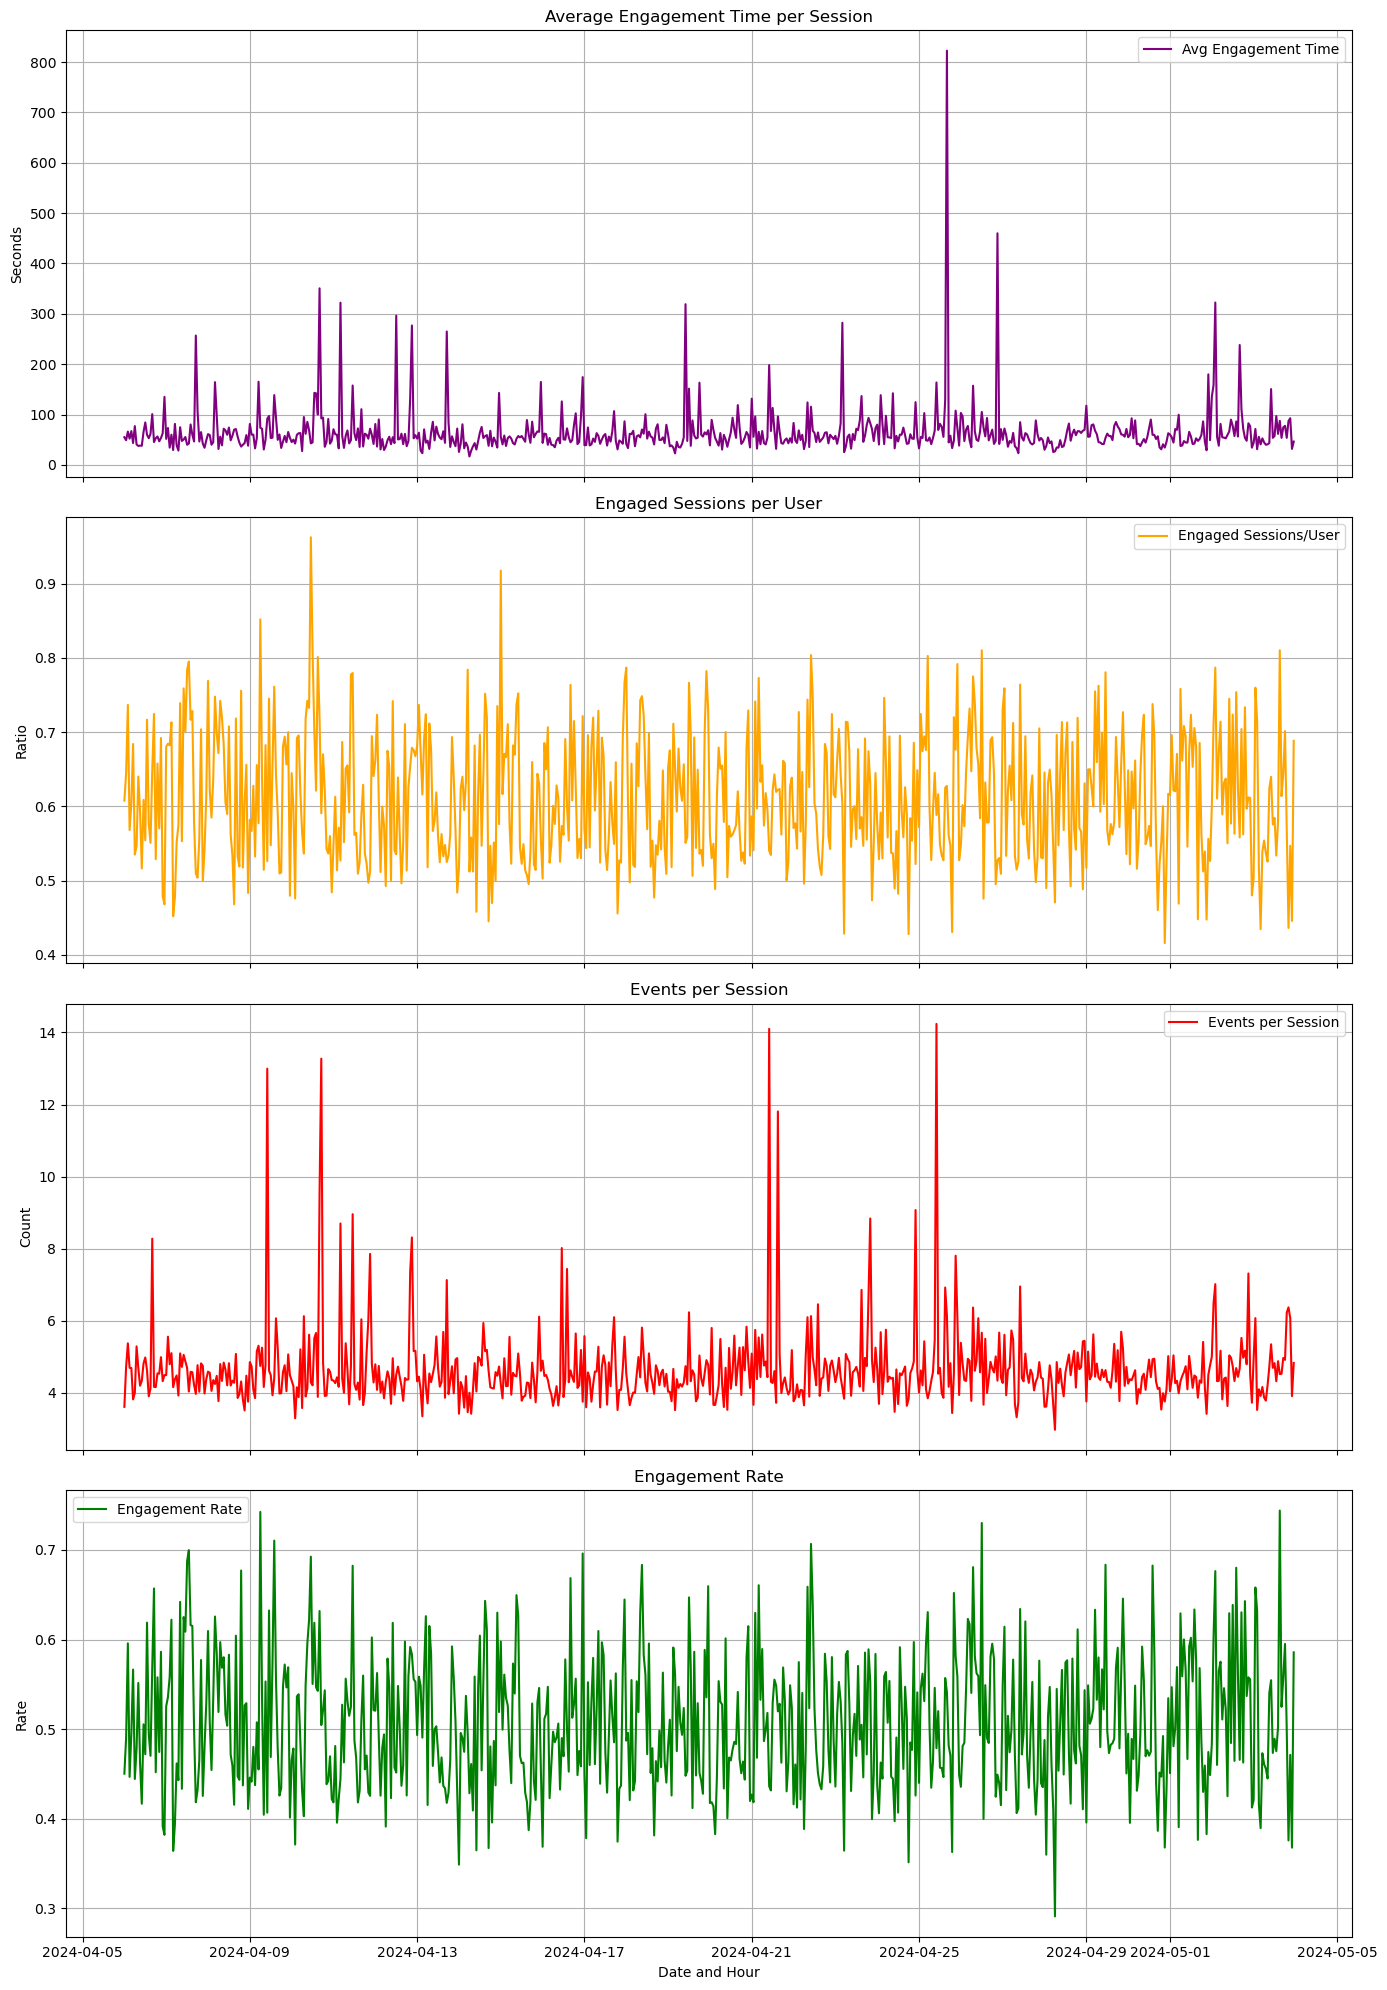

In [10]:
# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

Observation:


**Average Engagement Time per Session:** The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.

**Engaged Sessions per User:** This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.

**Events per Session:** The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.

**Engagement Rate:** The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.

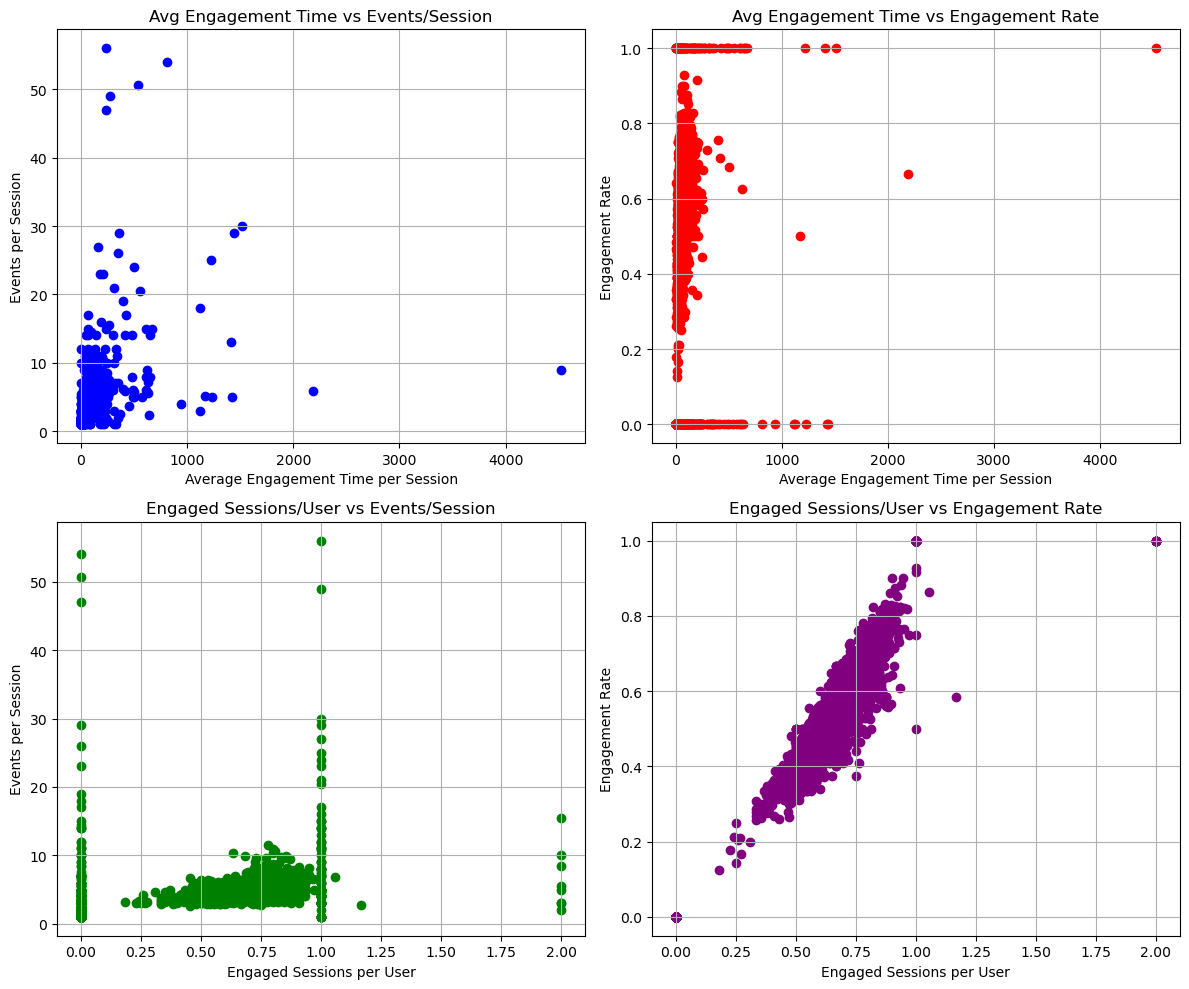

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Observations:

1) **Average Engagement Time vs Events per Session:** There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.
2) **Average Engagement Time vs Engagement Rate:** There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.
3) **Engaged Sessions per User vs Events per Session:** Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.
4) **Engaged Sessions per User vs Engagement Rate:** There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.

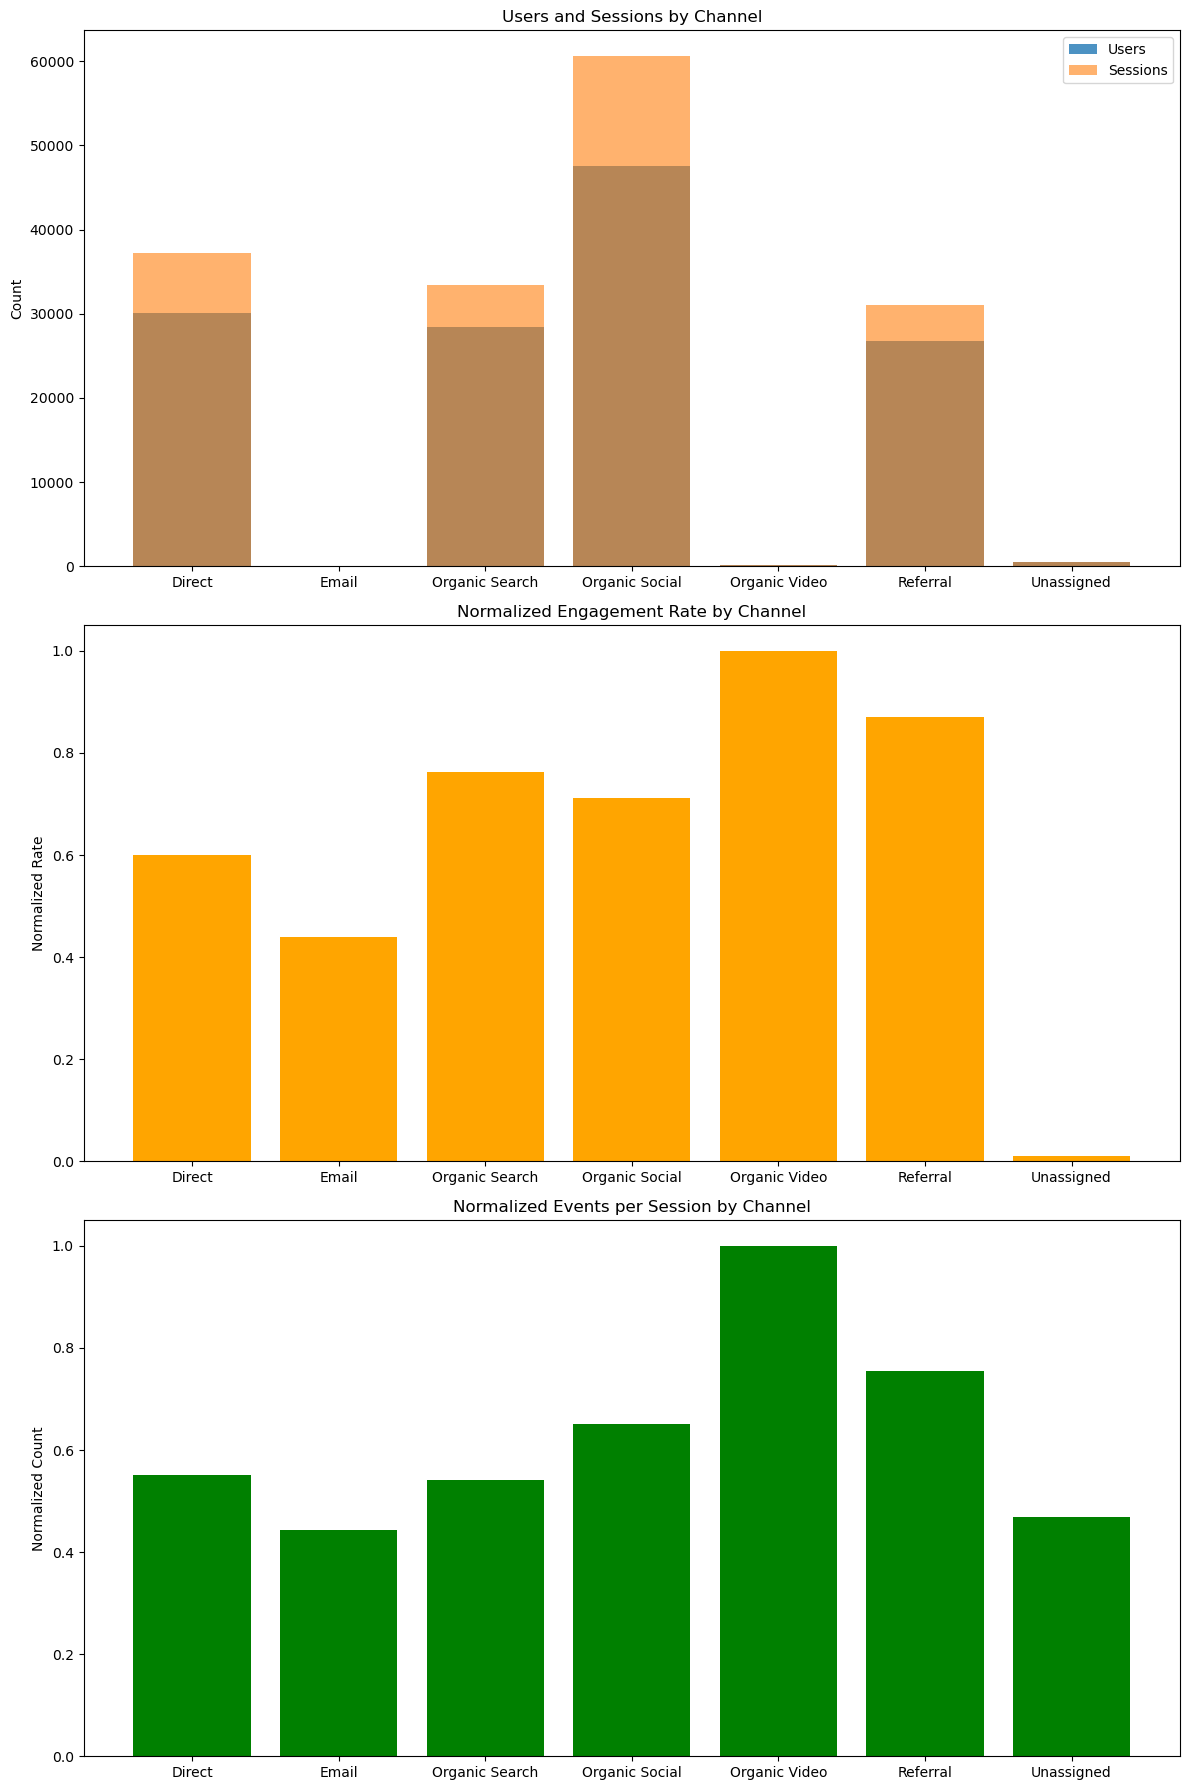

In [12]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

## Forecasting Website Traffic

2025-02-05 11:26:14.980776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738734975.108577  635592 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738734975.129777  635592 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 11:26:15.835992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Daily data shape: (28, 1)


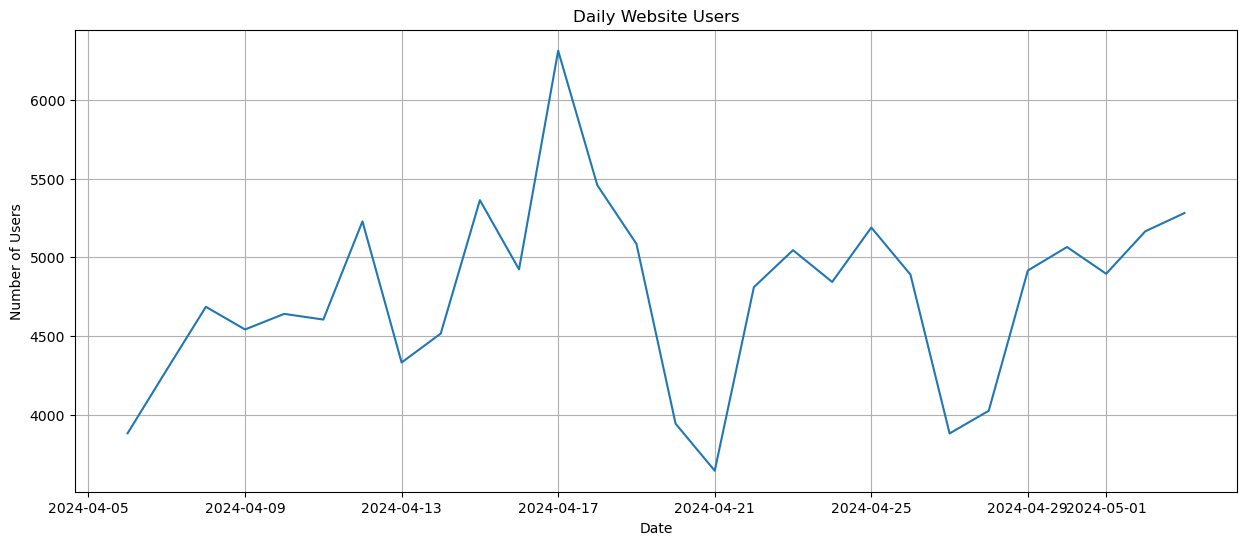


Model Summary:


2025-02-05 11:26:33.668675: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/rgukt/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2646 - mae: 0.4479 - val_loss: 0.1386 - val_mae: 0.3085
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.2628 - mae: 0.4471 - val_loss: 0.1345 - val_mae: 0.3017
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.2537 - mae: 0.4369 - val_loss: 0.1303 - val_mae: 0.2947
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.2435 - mae: 0.4286 - val_loss: 0.1264 - val_mae: 0.2880
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.2371 - mae: 0.4221 - val_loss: 0.1224 - val_mae: 0.2809
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.2375 - mae: 0.4204 - val_loss: 0.1182 - val_mae: 0.2733
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.2262 - mae: 0.4084 - val_loss: 0.1139 - val_mae: 0.2654
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.2199 - mae: 0.4021 - val_loss: 0.1096 - val_mae: 0.2571
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.2105 -

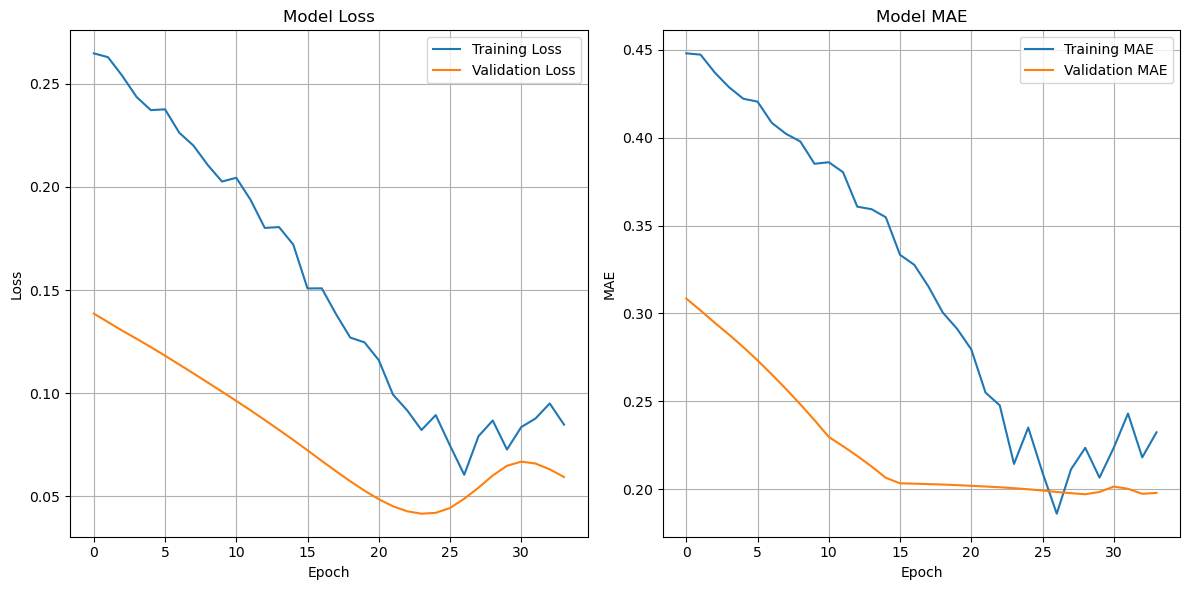

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


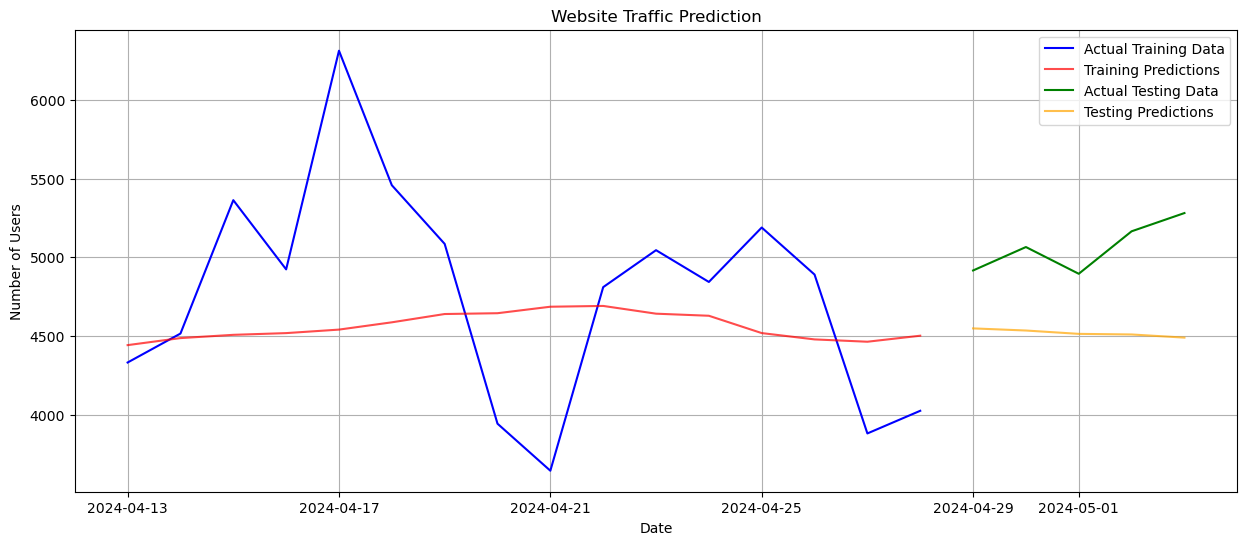


Model Performance Metrics:
Training RMSE: 707.24
Testing RMSE: 569.26
Training MAE: 569.82
Testing MAE: 545.71


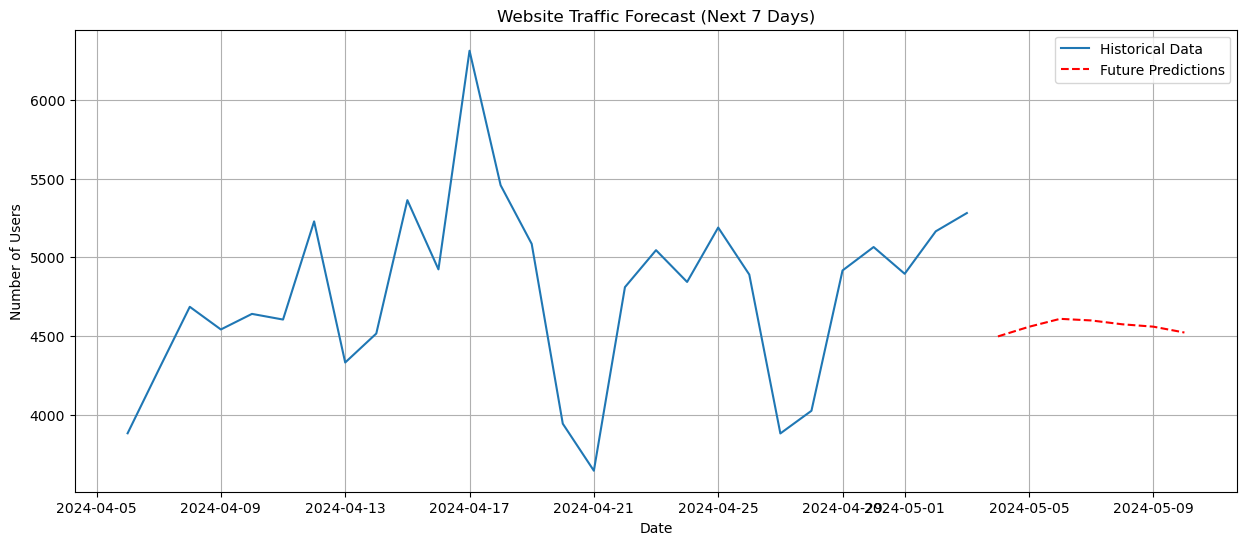


Predicted Users for Next 7 Days:
2024-05-04: 4496 users
2024-05-05: 4558 users
2024-05-06: 4608 users
2024-05-07: 4598 users
2024-05-08: 4573 users
2024-05-09: 4558 users
2024-05-10: 4521 users


In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# 1. Prepare time series data
daily_data = data.groupby(data['Date + hour (YYYYMMDDHH)'].dt.date)['Users'].sum().reset_index()
daily_data.rename(columns={'Date + hour (YYYYMMDDHH)': 'Date'}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

print("Daily data shape:", daily_data.shape)

# Plot daily users
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['Users'])
plt.title('Daily Website Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# 2. Create windowed dataset function
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps)])
        y.append(dataset[i + time_steps])
    return np.array(X), np.array(y)

# 3. Prepare data for modeling
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data['Users'].values.reshape(-1, 1))

# Define parameters
TIME_STEPS = 7  # Number of time steps to look back
SPLIT_RATIO = 0.8  # Train-test split ratio

# Create sequences
X, y = create_dataset(scaled_data, TIME_STEPS)

# Split into train and test sets
train_size = int(len(X) * SPLIT_RATIO)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 4. Create and compile the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(TIME_STEPS, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
print("\nModel Summary:")
model.summary()

# 5. Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 6. Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))  # Fixed here
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))    # Fixed here

# 8. Visualize results
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index[TIME_STEPS:train_size+TIME_STEPS], 
         y_train_inv, 
         label='Actual Training Data',
         color='blue')
plt.plot(daily_data.index[TIME_STEPS:train_size+TIME_STEPS], 
         train_predict, 
         label='Training Predictions',
         color='red',
         alpha=0.7)
plt.plot(daily_data.index[train_size+TIME_STEPS:], 
         y_test_inv, 
         label='Actual Testing Data',
         color='green')
plt.plot(daily_data.index[train_size+TIME_STEPS:], 
         test_predict, 
         label='Testing Predictions',
         color='orange',
         alpha=0.7)
plt.title('Website Traffic Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

# 9. Calculate performance metrics
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))
train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

print('\nModel Performance Metrics:')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}')
print(f'Training MAE: {train_mae:.2f}')
print(f'Testing MAE: {test_mae:.2f}')

# 10. Future predictions
def predict_future(model, last_sequence, n_steps):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_steps):
        current_sequence_reshaped = current_sequence.reshape((1, TIME_STEPS, 1))
        next_pred = model.predict(current_sequence_reshaped, verbose=0)
        future_predictions.append(next_pred[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred
    
    return np.array(future_predictions)

# Get last sequence
last_sequence = scaled_data[-TIME_STEPS:]

# Predict next 7 days
future_days = 7
future_predictions = predict_future(model, last_sequence, future_days)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create future dates
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=future_days)

# Plot with future predictions
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index[-30:], daily_data['Users'][-30:], label='Historical Data')
plt.plot(future_dates, future_predictions, 'r--', label='Future Predictions')
plt.title('Website Traffic Forecast (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
print('\nPredicted Users for Next 7 Days:')
for date, pred in zip(future_dates, future_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {int(pred[0])} users")